In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] = 300
sns.set(style="whitegrid")
plt.rcParams.update(
    {
        "axes.linewidth": 1,
    }
)

In [2]:
with open("output/log.txt", "r") as f:
    ll = f.readlines()
    df = pd.DataFrame([eval(l) for l in ll])

In [3]:
df_for_plot = df[
    [
        "test_96_acc1",
        "test_96_acc5",
        "test_192_acc1",
        "test_192_acc5",
        "test_384_acc1",
        "test_384_acc5",
        "epoch",
    ]
].melt(id_vars="epoch", value_name="testing accuracy %")
df_for_plot["resolution"] = df_for_plot["variable"].apply(lambda x: x.split("_")[1])
df_for_plot["top-k"] = df_for_plot["variable"].apply(
    lambda x: x.split("_")[2].replace("acc", "k=")
)

(0.0, 100.0)

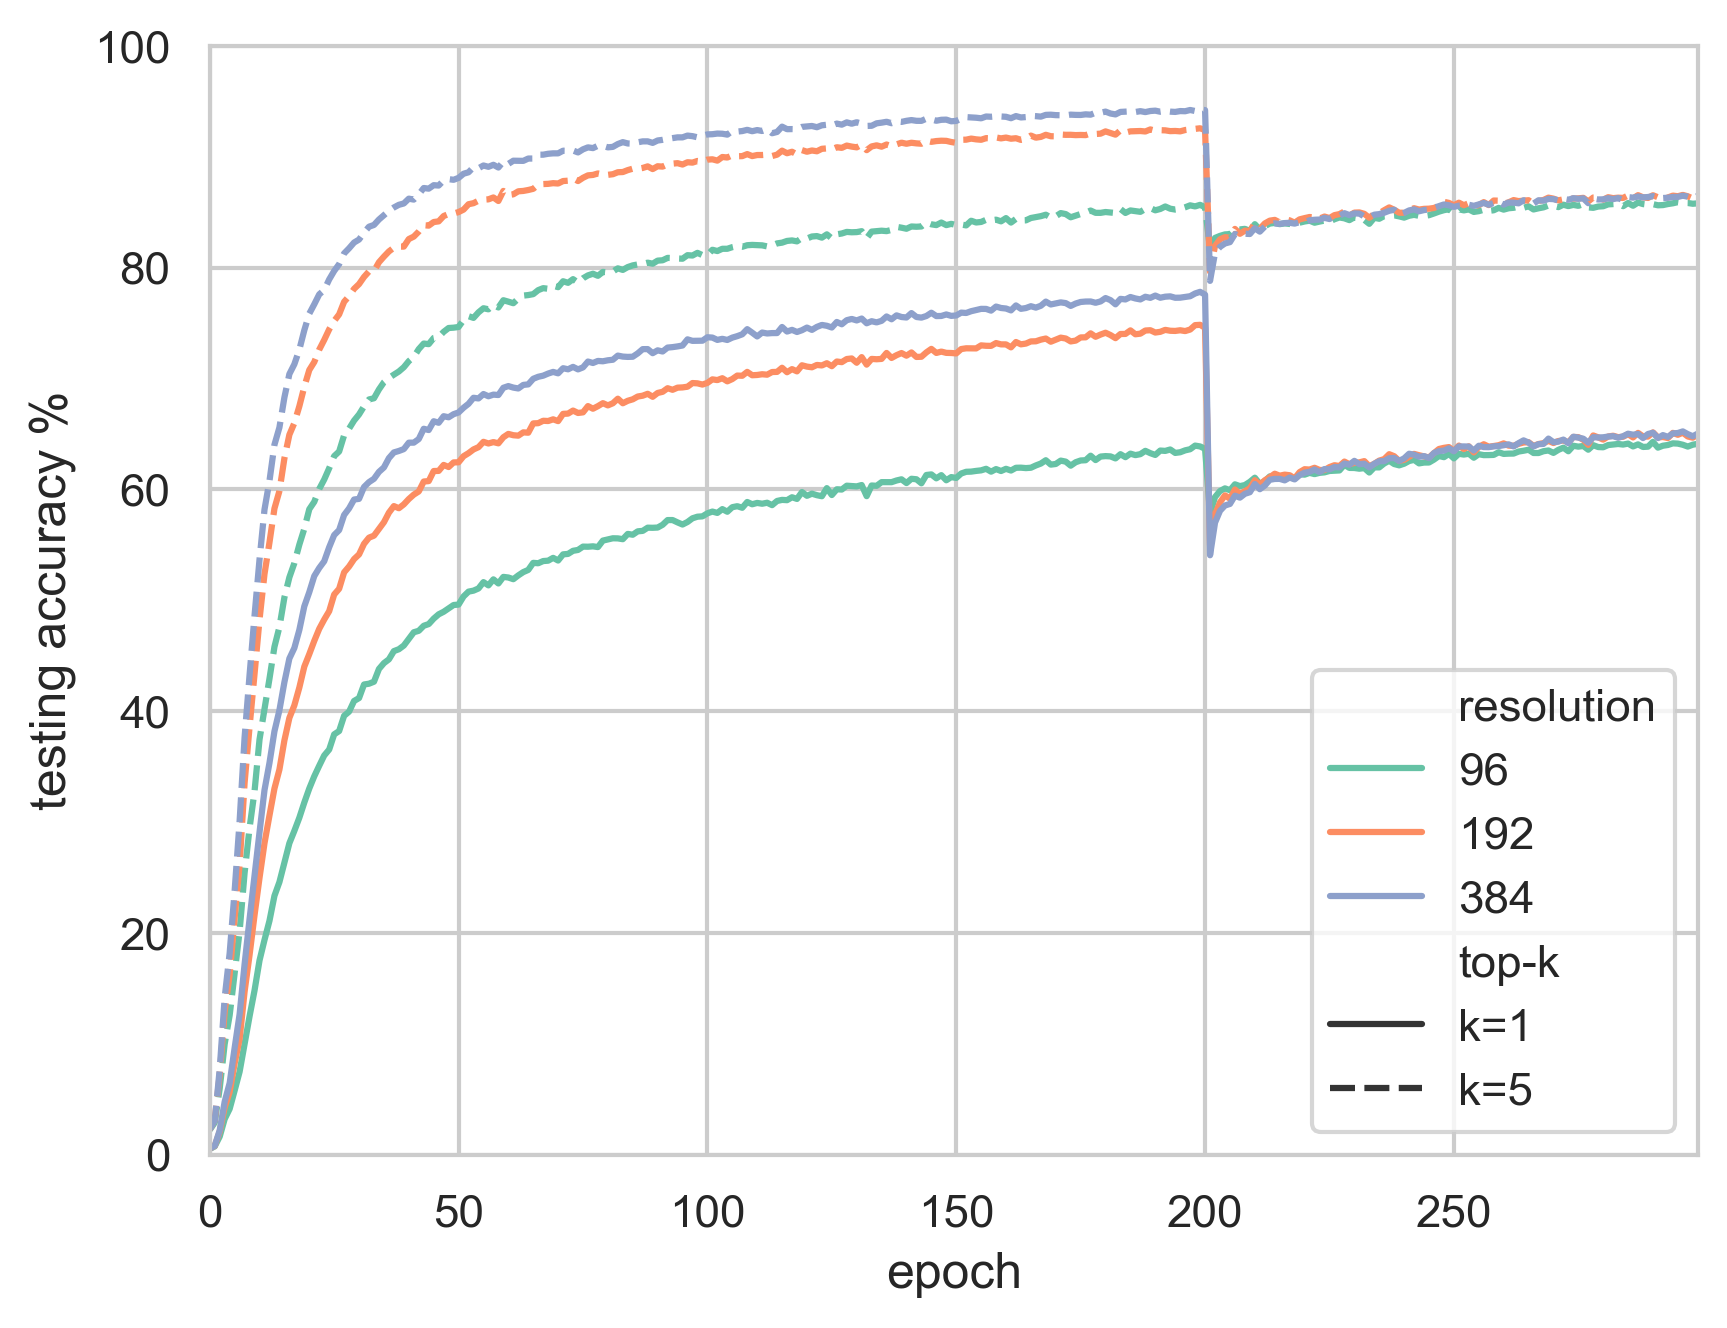

In [4]:
sns.lineplot(
    data=df_for_plot,
    x="epoch",
    y="testing accuracy %",
    hue="resolution",
    style="top-k",
    palette="Set2",
)
plt.xlim(df_for_plot["epoch"].min(), df_for_plot["epoch"].max())
plt.ylim(0, 100)
# plt.savefig("test_acc.svg", format="svg")